# **Car Price Analysis**
By **Adryan R A**

The car price dataset contain 205 data that has dependent variable price. The dataset will be transform using scaler and log to get to normal distribution as possible. There are some outlier in the data but the model has good result in regression model. The adjusted R-Squared has score 92.4% that mean 92.4% of covariance in the model can be explained and this model can be used to interpret the independent variable. Using T-test on coefficient of the regression model. We get that:

Increasing variable:
*   1% increase on bodywitdh increase price by 0.03% 
*   1% increase on bodywitdh increase price by 0.79% 

Decreasing Variable:
*   1% increase on stroke decrease price by 5% 
*   1% increase on citympg decrease price by 0.56% 

Another variable but in my opinion its not the enginelocation variable that make the price different, but the car that has engine on the rear are sport car.
*   enginelocation on rear has 45% higher price than enginelocation on the front

In this simple project we dont make change in two or more variable that has dependent. The model R-squared has high number but lots of variable has insignificant T-test result on coefficient = 0. There are some variable that has correlation bigger than 0.5. Actually we need to transform that correlated variable. But for started project we dont transform correlated variable now.








****

### Car Price Data Description


*   Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
*   fueltype : Car fuel type i.e gas or diesel (Categorical)
*   aspiration : Aspiration used in a car (Categorical)
*   enginetype : Type of engine. (Categorical)
*   cylindernumber : cylinder placed in the car (Categorical)
*   enginesize : Size of car (Numeric)
*   fuelsystem : Fuel system of car (Categorical)
*   boreratio : Boreratio of car (Numeric)
*   stroke : Stroke or volume inside the engine (Numeric)
*   compressionratio : compression ratio of car (Numeric)
*   citympg : Mileage in city (Numeric)
*   highwaympg : Mileage on highway (Numeric)
*   price(Dependent variable) : Price of car (Numeric)















Importing Library that needed to process this data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer


In [2]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

Show top 5 data from the dataset

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_copy = df[['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

Checking if the data has some missing data

In [5]:
df_copy.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**No Missing Data**
Using isnull().sum() to count how many missing data in each column. The number showing 0 so no missing data in the dataset

Lets see some statistic

In [6]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


For this statistic part, we want to compare mean and 50% (median). If you look at the table, we will find there is one column that has big different between mean and median. The column is "price" column. So lets check with boxplot to see if there is outlier in the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


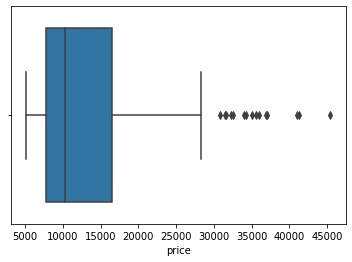

In [7]:
sns.boxplot(df_copy['price'])
plt.show()

The data is right skewed and as you can see in the boxplot. There are outlier in the data

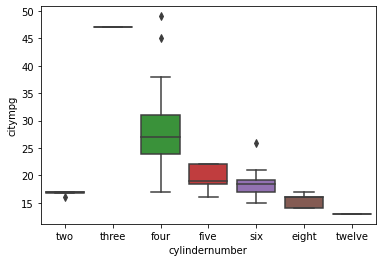

In [8]:
sns.boxplot(x = 'cylindernumber', y = 'citympg', data = df_copy, order = ['two','three','four','five','six','eight','twelve'])

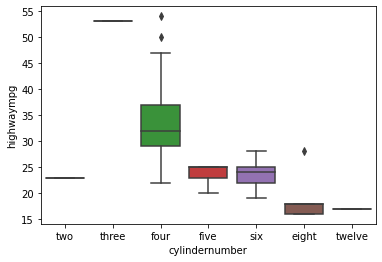

In [9]:
sns.boxplot(x = 'cylindernumber', y = 'highwaympg', data = df_copy, order = ['two','three','four','five','six','eight','twelve'])

From the data actually we got that 3 and 4 cylinder use more fuel per mile than other bigger number of cylinder number. Lets see the correlation between feature to get the better result for analysis.

In [10]:
df_copy.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


Using df.corr() we can get correlation between each feature, but as you can see the table above, its not good to see the result as the feature number is big. Lets using some visualization

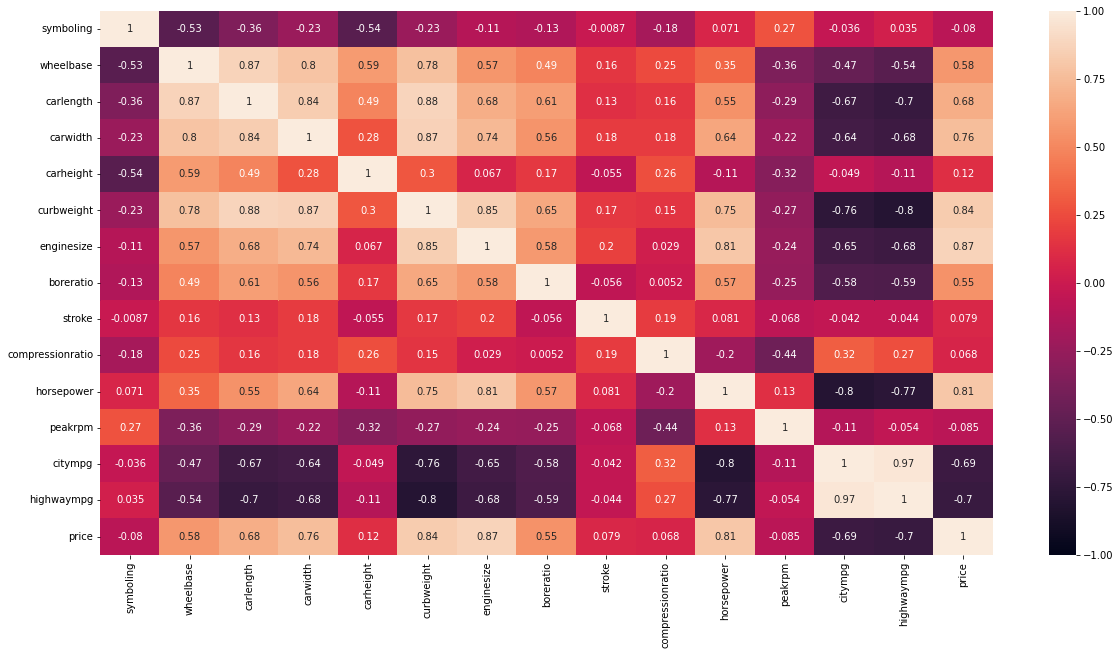

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(), vmin = -1, vmax = 1, annot = True)

Now you can see that its better to look for some insight. For example to know what make car price higher and lower we can see that. car size and other relation (witdh,weight,size) has big positive correlation. Higher horse power makes car price higher but higher mpg makes car price lower.

## Transform Numerical Data For Machine Learning Regression Model

In [12]:
df_copy.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


First we will look at the distribution of each numerical feature and transform it to normal distribution. Lets convert all numerical feauture with StandardScaler

**Normal Data**

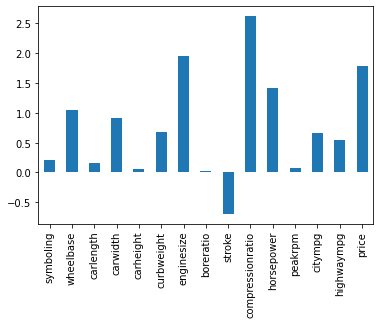

In [13]:
df_copy.skew().plot.bar()

**StandardScaler**

In [14]:
df_try = df_copy.copy()
cols = ['wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
df_try[cols] = StandardScaler().fit_transform(df_try[cols])

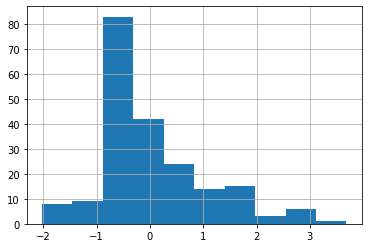

In [15]:
df_try['wheelbase'].hist()

Lets plot it to look for skewed distribution

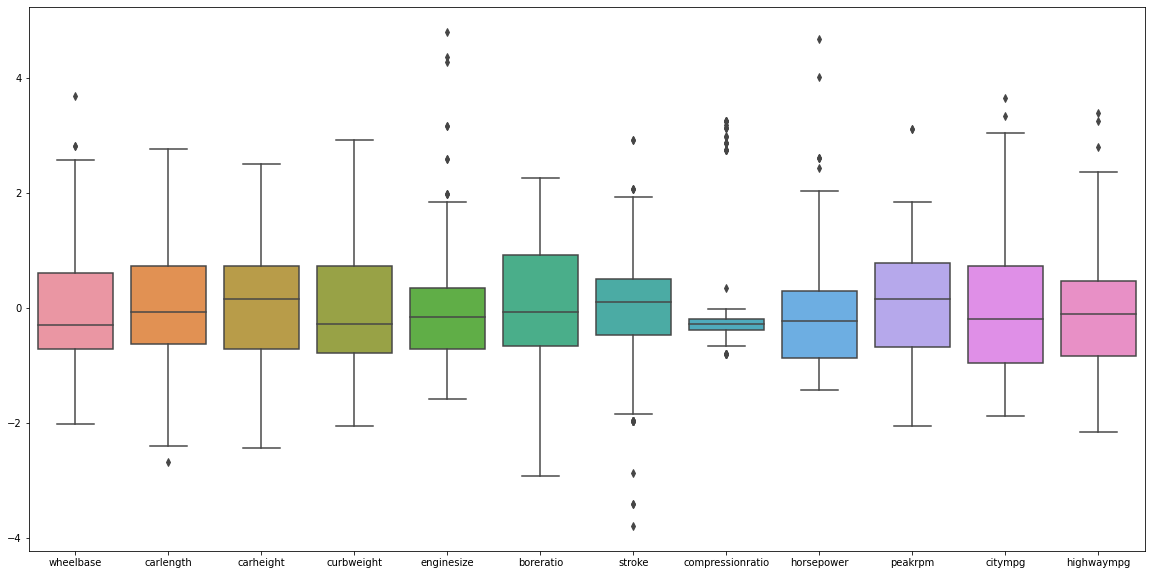

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(data=df_try[cols])
plt.show()

The middle line of the the graph show where the median is. If its not located in the middle of the graph than its skewed. For better visualization, we will look at the bar graph of the feature's skew

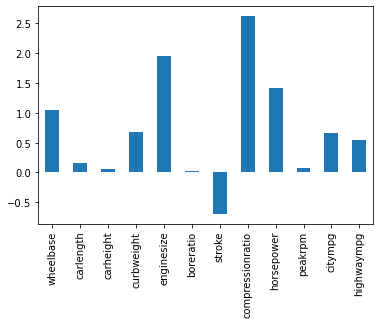

In [17]:
df_try[cols].skew().plot.bar()
plt.show()

**MinMaxScaler**

In [18]:
df_try_3 = df_copy.copy()
df_try_3[cols] = MinMaxScaler().fit_transform(df_try_3[cols])

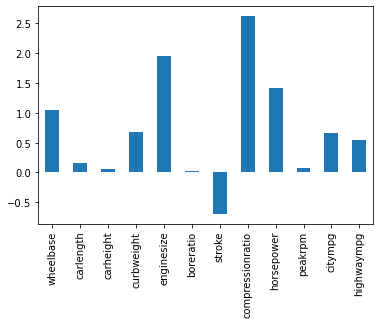

In [19]:
df_try_3[cols].skew().plot.bar()

**Log**

In [20]:
df_try_4 = df_copy.copy()
for col in cols:
  df_try_4[col] = np.log(df_try_4[col])

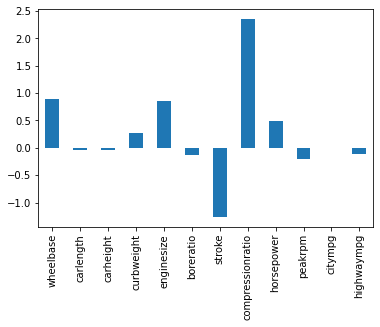

In [21]:
df_try_4[cols].skew().plot.bar()

**Transform Conclusion**

We want normal distribution for the data, we compare 4 method and use each minimal method for each columns. But we will minilize using powertransformer for interpretation of coefficient later

In [22]:
comparison = pd.DataFrame([df_copy[cols].skew(),df_try[cols].skew(),df_try_3[cols].skew(),df_try_4[cols].skew()]).T
comparison.columns=['Normal','StandardScaler','MinMaxScaler','Log']
comparison

,Normal,StandardScaler,MinMaxScaler,Log
wheelbase,1.050214,1.050214,1.050214,0.883387
carlength,0.155954,0.155954,0.155954,-0.047191
carheight,0.063123,0.063123,0.063123,-0.040178
curbweight,0.681398,0.681398,0.681398,0.270090
enginesize,1.947655,1.947655,1.947655,0.857828
boreratio,0.020156,0.020156,0.020156,-0.138266
stroke,-0.689705,-0.689705,-0.689705,-1.260319
compressionratio,2.610862,2.610862,2.610862,2.349716
horsepower,1.405310,1.405310,1.405310,0.482838
peakrpm,0.075159,0.075159,0.075159,-0.199730


We will using StandardScaler for column boreratio, stroke, peakrpm. The other column will transform using log

In [23]:
StandardScaler_cols = ['boreratio','stroke','peakrpm']
Log_cols = [col for col in cols if col not in StandardScaler_cols]

In [24]:
df_transformed = df_copy.copy()

In [25]:
df_transformed[StandardScaler_cols] = StandardScaler().fit_transform(df_transformed[StandardScaler_cols])

In [26]:
for col in Log_cols: 
  df_transformed[col] = np.log(df_transformed[col])

Check skewness using boxplot

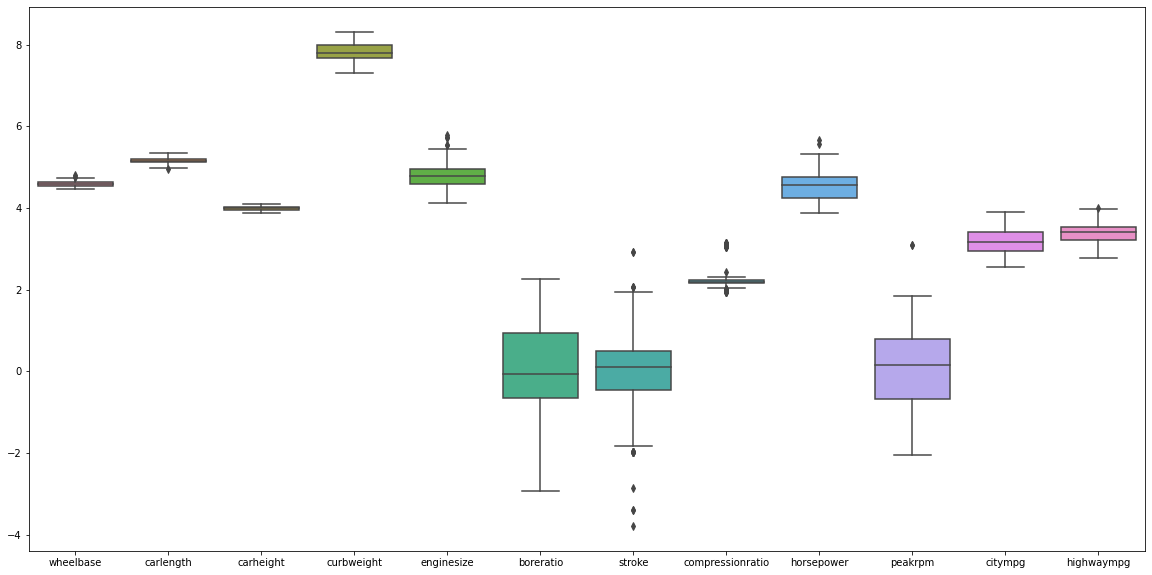

In [27]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df_transformed[cols])
plt.show()

The middle line is more centered than before. Lets check our dependent variable skewness

In [28]:
df['price'].skew()

1.7776781560914454

In [29]:
np.log(df['price']).skew()

0.672888533977329

We will transform our dependent variable using log

In [30]:
df_transformed['price'] = np.log(df_transformed['price'])

## Transform Categorical Data For Machine Learning Regression Model

In [31]:
df_transformed.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,64.1,3.887730,7.843064,dohc,four,4.867534,mpfi,0.519071,-1.839377,2.197225,4.709530,-0.262960,3.044522,3.295837,9.510075
1,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,64.1,3.887730,7.843064,dohc,four,4.867534,mpfi,0.519071,-1.839377,2.197225,4.709530,-0.262960,3.044522,3.295837,9.711116
2,1,gas,std,two,hatchback,rwd,front,4.548600,5.142832,65.5,3.958907,7.945555,ohcv,six,5.023881,mpfi,-2.404880,0.685946,2.197225,5.036953,-0.262960,2.944439,3.258097,9.711116
3,2,gas,std,four,sedan,fwd,front,4.603168,5.173887,66.2,3.994524,7.756623,ohc,four,4.691348,mpfi,-0.517266,0.462183,2.302585,4.624973,0.787855,3.178054,3.401197,9.543235
4,2,gas,std,four,sedan,4wd,front,4.599152,5.173887,66.4,3.994524,7.945910,ohc,five,4.912655,mpfi,-0.517266,0.462183,2.079442,4.744932,0.787855,2.890372,3.091042,9.767095


In [32]:
categorical_cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [33]:
df_transformed = pd.get_dummies(df_transformed, prefix=categorical_cols, columns=categorical_cols, drop_first=True)

The data has been transformed successfully

In [34]:
df_transformed.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.484132,5.128715,64.1,3.887730,7.843064,4.867534,0.519071,-1.839377,2.197225,4.709530,-0.262960,3.044522,3.295837,9.510075,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,4.484132,5.128715,64.1,3.887730,7.843064,4.867534,0.519071,-1.839377,2.197225,4.709530,-0.262960,3.044522,3.295837,9.711116,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,4.548600,5.142832,65.5,3.958907,7.945555,5.023881,-2.404880,0.685946,2.197225,5.036953,-0.262960,2.944439,3.258097,9.711116,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,4.603168,5.173887,66.2,3.994524,7.756623,4.691348,-0.517266,0.462183,2.302585,4.624973,0.787855,3.178054,3.401197,9.543235,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,4.599152,5.173887,66.4,3.994524,7.945910,4.912655,-0.517266,0.462183,2.079442,4.744932,0.787855,2.890372,3.091042,9.767095,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Linear Regression Model
Now lets using linear regression to predict the model. As this project is an example by Adryan R A for learning and the model is too small. We wont use for predicting but for analysing and example.

In [35]:
X = df_transformed.drop(['price'], axis=1)
y = df_transformed['price']

**Train Test Split Data**
We split the data with 0.1 ratio

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(X_train,y_train)
yhat = model.predict(X_test)

Check the MSE for X_test data

In [46]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, yhat)
print(MSE)

0.014396694842972534


The MSE number is very small so the our model is good enough. lets chech with R^2

In [49]:
R2 = 1 - MSE/np.var(y_test)
print(R2)

0.9470702362858439


Our model R2 is very high that has 0.94 or 94% covariance in our data can be explained by our model. Lets ttry using statsmodel for t-test our coefficient

**Interpreting Coefficient of Linear Regression Model**

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     61.43
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           7.56e-80
Time:                        04:02:35   Log-Likelihood:                 137.20
No. Observations:                 205   AIC:                            -190.4
Df Residuals:                     163   BIC:                            -50.83
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41